In [89]:
from __future__ import print_function

from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
import os

batch_size = 32
num_classes = 10
epochs = 3
learning_rate = 0.001

(x_train,y_train), (x_test,y_test) = cifar10.load_data()

print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train,num_classes) #keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)   #keras.utils.to_categorical(y_test,num_classes)

model = keras.Sequential()

model.add(Conv2D(32, (3,3), padding='same',
             input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=learning_rate,decay=1e-6)#keras.optimizers.rmsprop(lr=0.0001,decay=1e-6)

model.compile(loss = 'categorical_crossentropy',
             optimizer=opt,
             metrics = ['accuracy'])
#print(model.summary())

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [90]:
history = model.fit(x_train,y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test,y_test),
            shuffle=True)

model.save("C:/Users/gabri/Curso_Visao_Computacional/CIFAR10/save_models/cifar_"+str(epochs)+"_"+str(batch_size)+"_"+str(learning_rate)+".h5")

Epoch 1/3
1563/1563 [==============================] - 171s 109ms/step - loss: 1.5365 - accuracy: 0.4457 - val_loss: 1.1772 - val_accuracy: 0.5736
Epoch 2/3
1563/1563 [==============================] - 176s 113ms/step - loss: 1.1367 - accuracy: 0.6008 - val_loss: 0.9407 - val_accuracy: 0.6716
Epoch 3/3
1563/1563 [==============================] - 170s 109ms/step - loss: 1.0146 - accuracy: 0.6501 - val_loss: 0.9054 - val_accuracy: 0.6880


In [91]:
classifier = load_model("C:/Users/gabri/Curso_Visao_Computacional/CIFAR10/save_models/cifar_"+str(epochs)+"_"+str(batch_size)+"_"+str(learning_rate)+".h5")
resp = classifier.predict_classes(x_test,verbose=0)
print("Modelo carregado epochs "+str(epochs)+" batch_size "+str(batch_size)+ " learning_rate " +str(learning_rate))

scores = classifier.evaluate(x_test,y_test,verbose=1)
print('Test loss:',scores[0])
print('Test accuracy:',scores[1])

OSError: SavedModel file does not exist at: C:/Users/gabri/Curso_Visao_Computacional/CIFAR10/save_models/cifar_3_32_0.001.h5\{saved_model.pbtxt|saved_model.pb}

Test loss: 1.2212671041488647
Test accuracy: 0.6007000207901001


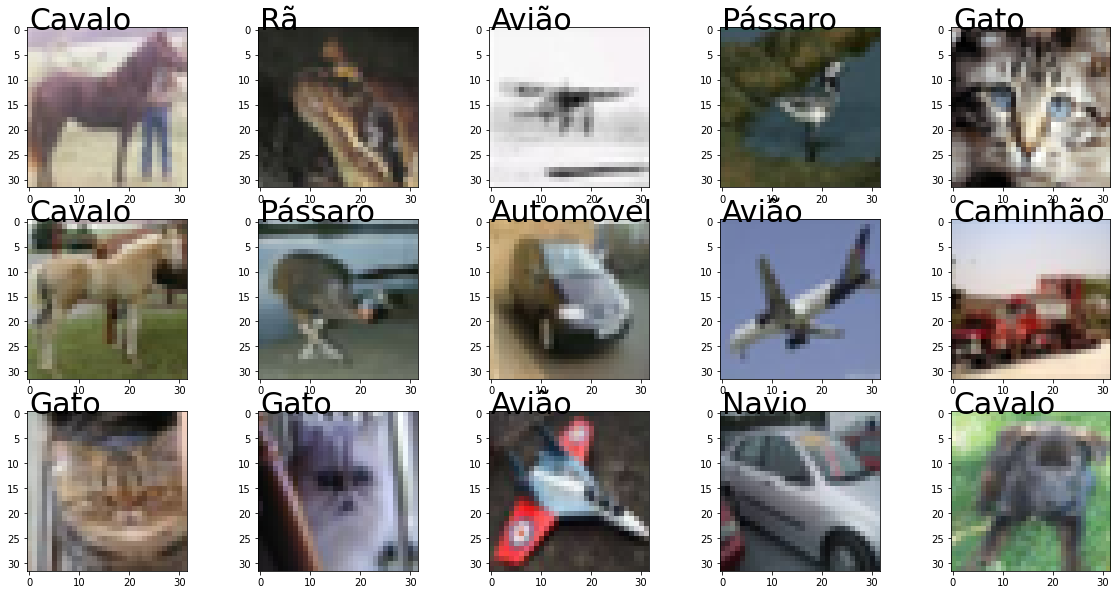

In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))
for i in range(15):

    plt.subplot(3,5,i+1)
    random_num = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_num])
    
    if resp[random_num] == 0: text = "Avião"
    if resp[random_num] == 1: text = "Automóvel"
    if resp[random_num] == 2: text = "Pássaro"
    if resp[random_num] == 3: text = "Gato"
    if resp[random_num] == 4: text = "Cervo"
    if resp[random_num] == 5: text = "Cão"
    if resp[random_num] == 6: text = "Rã"
    if resp[random_num] == 7: text = "Cavalo"
    if resp[random_num] == 8: text = "Navio"
    if resp[random_num] == 9: text = "Caminhão"
        
    plt.text(0,0,s=text,fontsize=30)

print('Test loss:',scores[0])
print('Test accuracy:',scores[1])